# Pandas e Visualização de Dados

Uma importante ferramenta no processo exploratório de dados é a visualização. Vamos analisar o dataset pokemon, tratar os dados, realizar algumas operações e, depois, vamos obter insights a partir da visualização de dados. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Faça a leitura do arquivo e armazene o DataFrame numa variável chamada poke
poke = pd.read_csv('bases/Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# imprime a quantidade de linhas e colunas presentes no DataFrame
print(poke.shape)
print('------------------------------------------\n')

# verifica e imprima as colunas que contêm valores faltantes
print(poke.isna().sum())
print('------------------------------------------\n')

# retorna as principais estatísticas das colunas numéricas
poke.describe()

(800, 13)
------------------------------------------

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
------------------------------------------



,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Percebemos que a coluna Type 2 possui alguns valores faltantes. Não temos informações sobre como preencher essa coluna da maneira correta. Assim, em todo linha que houver um valor faltando na colune Type 2, esse valor será preenchido com o valor correspondente da coluna Type 1. 

Documentação da função: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Exemplo de uso: [link](https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafram)

In [5]:
poke['Type 2'].fillna(poke['Type 1'],inplace=True)
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


Para selecionarmos colunas específicas de um DataFrame podemos fazer df[df['coluna1','coluna2']]. Exemplo: criar um novo DataFrame a partir de poke que contenha apenas os pokemons que são lendários

In [6]:
lendarios = poke[poke['Legendary'] == True]
lendarios.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


apply() é um poderoso método de vetorização, ou seja, permite a aplicação de uma função nos elementos de uma colunas de um DataFrame sem a necessidade de escrever laços de repetição. 

Veja alguns exemplos:

In [7]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [8]:
import numpy as np
# tirando a raiz quadrada de todos os elementos de df
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [9]:
# somando os elementos a partir das colunas
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

In [10]:
# somando os elementos a partir das linhas
df.apply(np.sum, axis=1)

0    13
1    13
2    13
dtype: int64

Podemos escrever uma função que passe para minúscula todos os elementos da coluna Name

In [11]:
format_str = lambda x: x.lower()
poke['Name'] = poke['Name'].apply(format_str)
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,venusaurmega venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


Agrupamento é uma ferramenta muito útil para fazer descobertas em nosso DataFrame. Preciso saber a representatividade de cada tipo (coluna Type 1) de pokemon e essa informação precisa ser retornada em ordem decrescente

Você vai precisar dos seguintes métodos:
> groupby [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

> size [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html)

> sort_values [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [12]:
poke_ordered = poke.groupby(by = 'Type 1').size().sort_values(ascending = False)
poke_ordered

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
dtype: int64

# Visualização de Dados

Para visualização de dados, vamos utilizar a biblioteca matplotlib, que tem sua documentação no link: [matplotlib](https://matplotlib.org/)

O matplotlib cria objetos do tipo Figure que irão armazenar as visualizações que iremos construir. Observe:

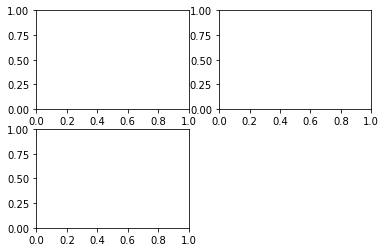

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Agora, podemos preencher esses objetos com dados, gerando, assim, gráficos:

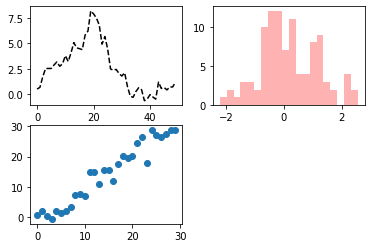

In [14]:
import numpy as np
from numpy.random import randn
ax1.plot(randn(50).cumsum(), 'k--') #gráfico de linha
ax2.hist(randn(100), bins=20, color='r', alpha=0.3)
ax3.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig

Nem sempre, entretando, precisamos criar o objeto primeiro para depois preencher com dados. Podemos armazenar os dados em variáveis e, então, a partir delas, construir nossos gráficos:

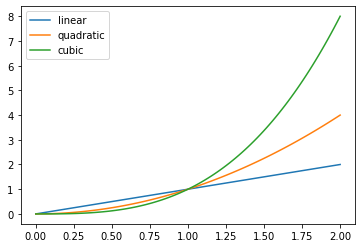

In [16]:
l = np.linspace(0, 2, 100)
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(l, l, label='linear')
ax.plot(l, l**2, label='quadratic')
ax.plot(l, l**3, label='cubic')


ax.legend()
fig.savefig('simple_plot.png')

Existem várias opções de ajustes visuais para os gráficos construídos com matplotlib. Observe os três gráficos a seguir:

Documentação: [link](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot)

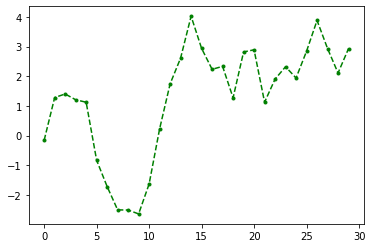

In [17]:
# cor, estilo da linha e marcadores
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='.')

Text(0, 0.5, 'Eixo y')

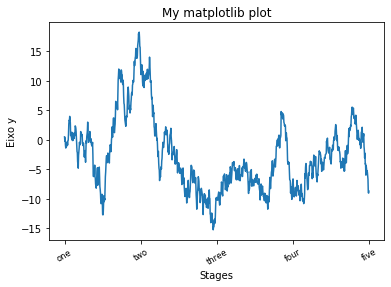

In [18]:
# título, rótulo dos eixos, ticks e seus rótulos
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('My matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Eixo y')

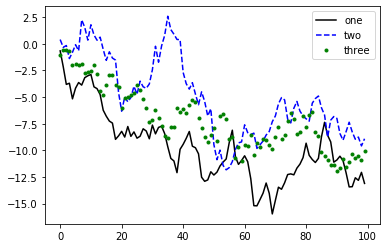

In [20]:
# adicionando legenda
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(100).cumsum(), 'k', label='one')
ax.plot(randn(100).cumsum(), 'b--', label='two')
ax.plot(randn(100).cumsum(), 'g.', label='three')
ax.legend(loc='best')

### Tipos de Gráficos

Além do gráfico de linha estamos trabalhando, há alguns outros que são interessantes conhecer. 

Na documentação oficial, há uma galeria de exemplos que mostra como se cria os mais diversos tipos de gráficos: [link](https://matplotlib.org/3.2.1/gallery/index.html)

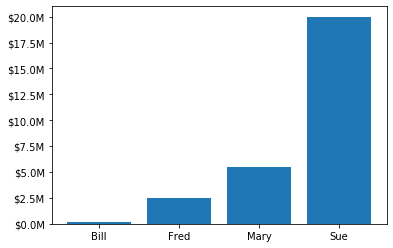

In [21]:
# Gráfico de Barras
from matplotlib.ticker import FuncFormatter
x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]
def millions(x, pos):
    'valor e posição'
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

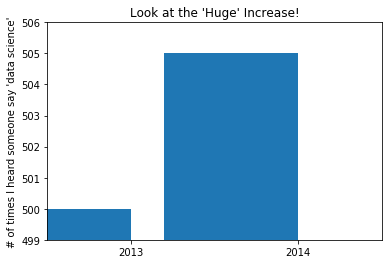

In [22]:
# Como enganar pessoas usando visualização
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

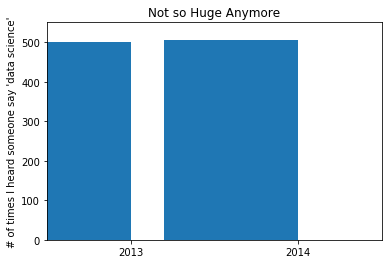

In [23]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not so Huge Anymore")
plt.show()

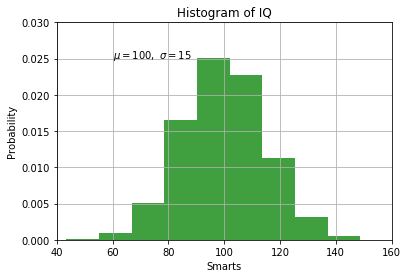

In [24]:
# Histograma
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=' + str(mu) + ',\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

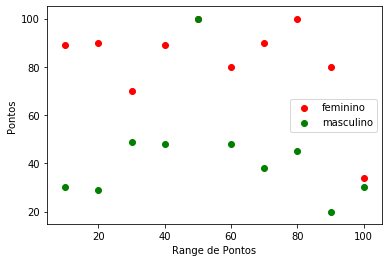

In [26]:
# Scatter-plot
pontos_f = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
pontos_m = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
range_pontos = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
feminino = plt.scatter(range_pontos, pontos_f, color='r')
masculino = plt.scatter(range_pontos, pontos_m, color='g')
plt.xlabel('Range de Pontos')
plt.ylabel('Pontos')
plt.legend((feminino, masculino),('feminino','masculino'),loc='best')
plt.show()

# TODO

Agora que entendemos como os gráficos são construídos, vamos praticar. A ideia é ter insights visuais a respeito do dataset que estamos trabalhando.

### 1) crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo.

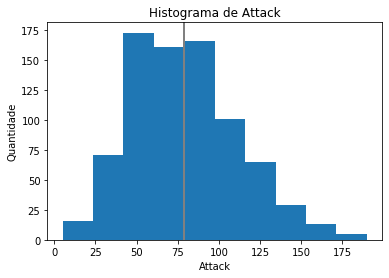

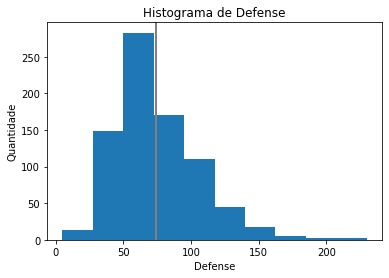

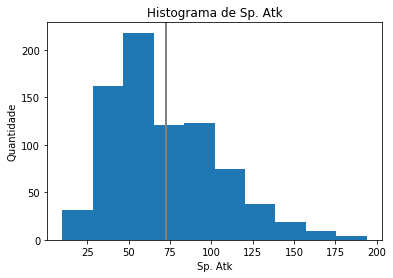

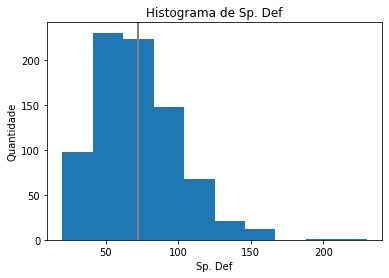

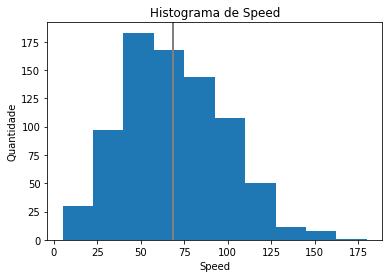

In [33]:
# Resposta
def hist_ds_atributo(ds,atributo):
    plt.hist(ds)
    plt.xlabel(atributo)
    plt.ylabel('Quantidade')
    plt.title('Histograma de ' + atributo)
    plt.axvline(ds.mean(), color='gray', linewidth=2)
    plt.show()
    
atributo_list = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for atrib in atributo_list:
    hist_ds_atributo(poke[atrib], atrib)

### 2) crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water.

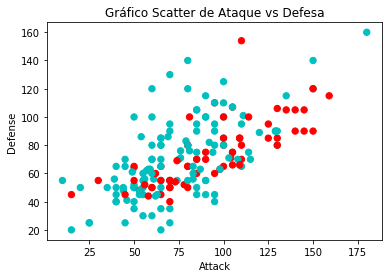

In [28]:
# Resposta
cor = lambda x : 'c' if (x['Type 1']=='Water' or x['Type 2']=='Water') else 'r'
ds = poke[poke['Type 1'].isin(['Fire','Water']) | poke['Type 2'].isin(['Fire','Water'])]
plt.scatter(ds['Sp. Atk'], ds['Sp. Def'], 40, ds.apply(cor, axis=1))
plt.title('Gráfico Scatter de Ataque vs Defesa')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

###  3) crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

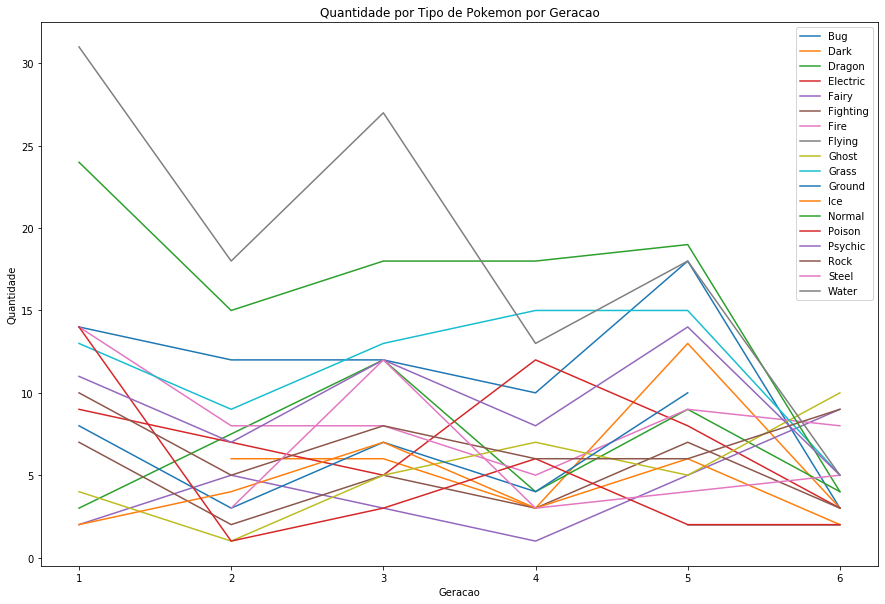

In [32]:
# Resposta
ds = poke.groupby(['Generation','Type 1'], as_index=False).count()
poke_types = ds['Type 1'].unique()
poke_types.sort()

plt.figure(figsize=(15,10))
plt.title('Quantidade por Tipo de Pokemon por Geracao')
plt.xlabel('Geracao')
plt.ylabel('Quantidade')

for pkt in poke_types:
    ds_line = ds[['Generation','#']][ds['Type 1'] == pkt]  
    plt.plot(ds_line['Generation'], ds_line['#'], label=pkt)

plt.legend()

In [30]:
ds = poke.groupby(['Generation','Type 1'], as_index=False).count()

In [31]:
ds

,Generation,Type 1,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bug,14,14,14,14,14,14,14,14,14,14,14
1,1,Dragon,3,3,3,3,3,3,3,3,3,3,3
2,1,Electric,9,9,9,9,9,9,9,9,9,9,9
3,1,Fairy,2,2,2,2,2,2,2,2,2,2,2
4,1,Fighting,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,6,Poison,2,2,2,2,2,2,2,2,2,2,2
94,6,Psychic,5,5,5,5,5,5,5,5,5,5,5
95,6,Rock,9,9,9,9,9,9,9,9,9,9,9
96,6,Steel,5,5,5,5,5,5,5,5,5,5,5
